# Seq to Sql translation 

In [5]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # 

In [6]:
for dirname, _, filenames in os.walk('spider'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

spider\.DS_Store
spider\dev.json
spider\dev_gold.sql
spider\README.txt
spider\tables.json
spider\train_gold.sql
spider\train_others.json
spider\train_spider.json
spider\database\academic\academic.sqlite
spider\database\academic\schema.sql
spider\database\activity_1\activity_1.sqlite
spider\database\activity_1\schema.sql
spider\database\aircraft\aircraft.sqlite
spider\database\aircraft\schema.sql
spider\database\allergy_1\allergy_1.sqlite
spider\database\allergy_1\schema.sql
spider\database\apartment_rentals\apartment_rentals.sqlite
spider\database\apartment_rentals\schema.sql
spider\database\architecture\architecture.sqlite
spider\database\architecture\schema.sql
spider\database\assets_maintenance\assets_maintenance.sqlite
spider\database\assets_maintenance\schema.sql
spider\database\baseball_1\baseball_1.sqlite
spider\database\baseball_1\schema.sql
spider\database\battle_death\battle_death.sqlite
spider\database\battle_death\schema.sql
spider\database\behavior_monitoring\behavior_moni

# Distribution graphs (histogram/bar graph) of column data

In [7]:

def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

# Correlation matrix

In [8]:

def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

# Scatter and density plots

In [9]:

def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

# model-list.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows

In [27]:
nRowsRead = 1000 # specify 'None' if want to read whole file

ml = pd.read_csv('C:\\Users\\Hp\\Documents\\spider\\database\\car_1\\data_csv\\model-list.csv', delimiter=',', nrows = nRowsRead)
ml.dataframeName = 'model-list.csv'
nRow, nCol = ml.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 36 rows and 3 columns


In [ ]:
ml.head(5)

In [ ]:
plotPerColumnDistribution(ml, 10, 5)

# model-list.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows

In [28]:
nRowsRead = 1000 # specify 'None' if want to read whole file
df2 = pd.read_csv('C:\\Users\\Hp\\Documents\\spider\\database\\car_1\\data_csv\\countries.csv', delimiter=',', nrows = nRowsRead)
df2.dataframeName = 'countries.csv'
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 15 rows and 3 columns


In [29]:
df2.head(5)

,CountryId,CountryName,Continent
0,1,'usa',1
1,2,'germany',2
2,3,'france',2
3,4,'japan',3
4,5,'italy',2


C:\Users\Hp\AppData\Local\Temp/ipykernel_10884/2490170222.py:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)
C:\Users\Hp\AppData\Local\Temp/ipykernel_10884/2490170222.py:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)


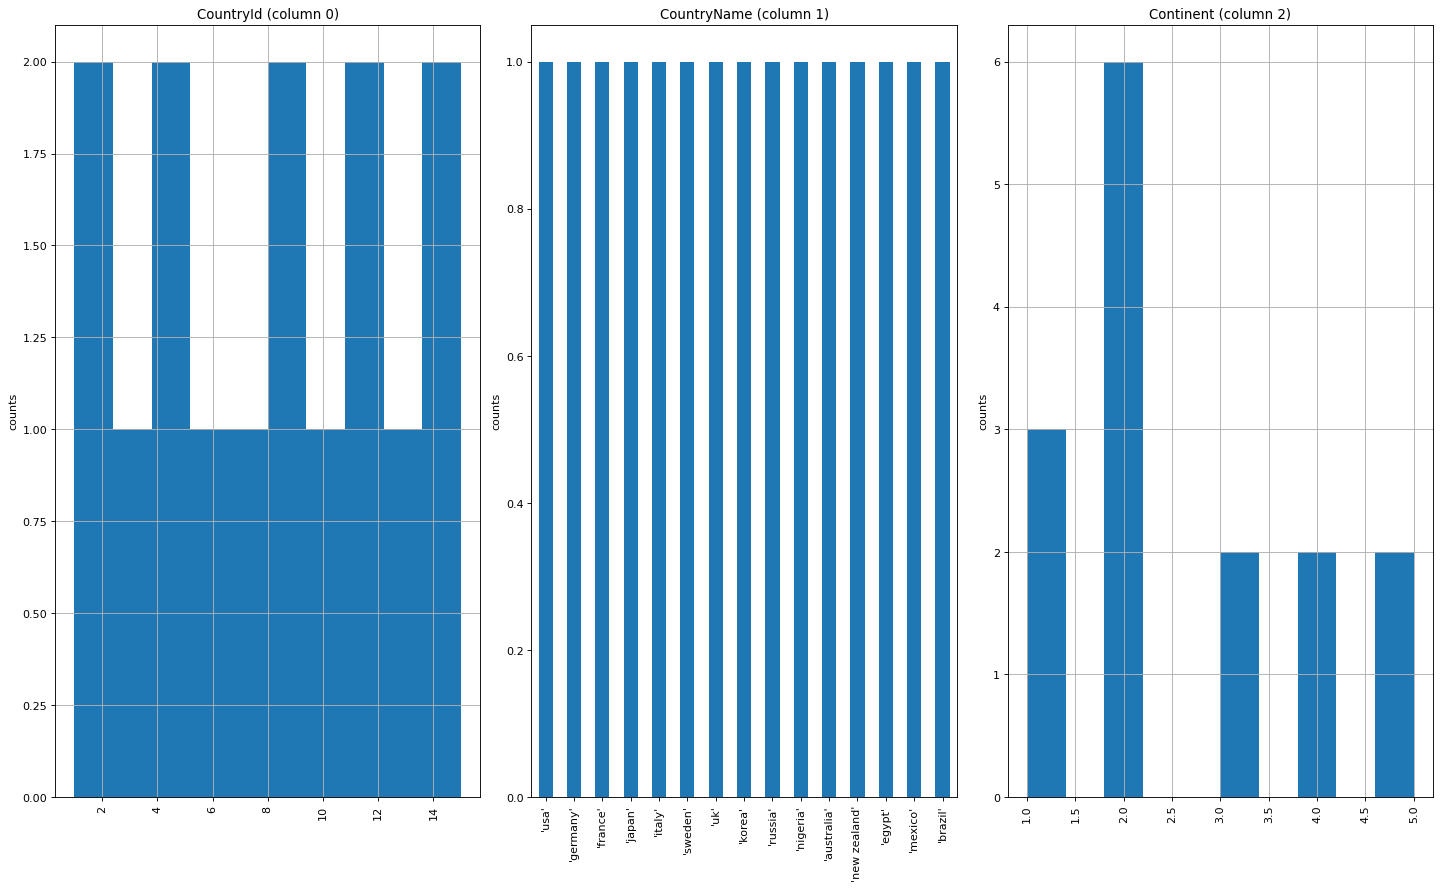

In [30]:
plotPerColumnDistribution(df2, 10, 5)

In [31]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# car-makers.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df3 = pd.read_csv('C:\\Users\\Hp\\Documents\\spider\\database\\car_1\\data_csv\\car-makers.csv', delimiter=',', nrows = nRowsRead)
df3.dataframeName = 'car-makers.csv'
nRow, nCol = df3.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 23 rows and 4 columns


In [32]:
df3.head(5)

,Id,Maker,FullName,Country
0,1,'amc','American Motor Company',1.0
1,2,'volkswagen','Volkswagen',2.0
2,3,'bmw','BMW',2.0
3,4,'gm','General Motors',1.0
4,5,'ford','Ford Motor Company',1.0


C:\Users\Hp\AppData\Local\Temp/ipykernel_10884/2490170222.py:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)
C:\Users\Hp\AppData\Local\Temp/ipykernel_10884/2490170222.py:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)
C:\Users\Hp\AppData\Local\Temp/ipykernel_10884/2490170222.py:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)


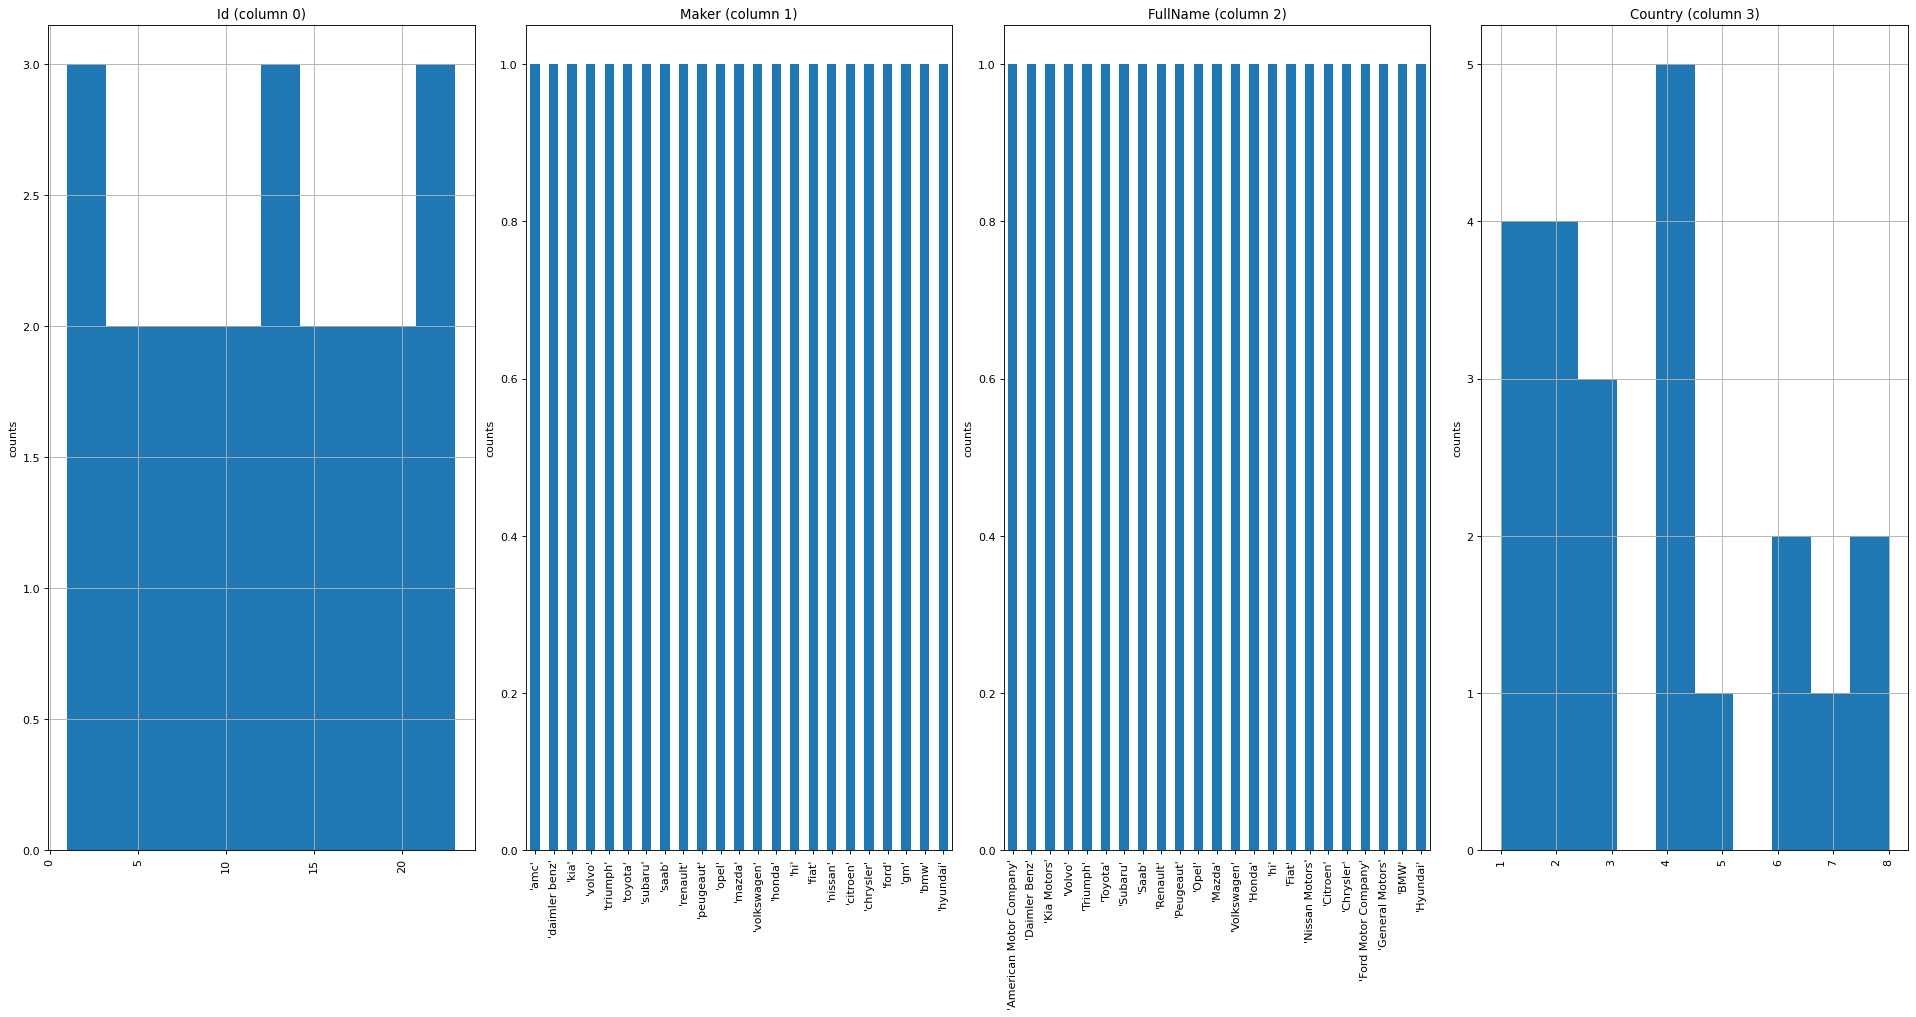

In [33]:
plotPerColumnDistribution(df3, 10, 5)

In [15]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# car-makers.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df4 = pd.read_csv('C:\\Users\\Hp\\Documents\\spider\\database\\car_1\\data_csv\\car-names.csv', delimiter=',', nrows = nRowsRead)
df4.dataframeName = 'car-names.csv'
nRow, nCol = df4.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 406 rows and 3 columns


In [16]:
df4.head(5)

,Id,Model,Make
0,1,'chevrolet','chevrolet chevelle malibu'
1,2,'buick','buick skylark 320'
2,3,'plymouth','plymouth satellite'
3,4,'amc','amc rebel sst'
4,5,'ford','ford torino'


C:\Users\Hp\AppData\Local\Temp/ipykernel_10884/2490170222.py:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)


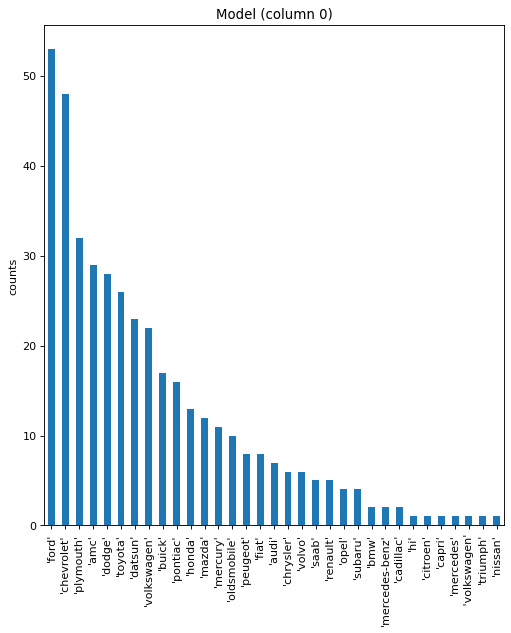

In [17]:
plotPerColumnDistribution(df4, 10, 5)

In [18]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# car-makers.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df5 = pd.read_csv('C:\\Users\\Hp\\Documents\\spider\\database\\car_1\\data_csv\\continents.csv', delimiter=',', nrows = nRowsRead)
df5.dataframeName = 'continents.csv'
nRow, nCol = df5.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 5 rows and 2 columns


In [19]:
df5.head(5)

,ContId,Continent
0,1,'america'
1,2,'europe'
2,3,'asia'
3,4,'africa'
4,5,'australia'


C:\Users\Hp\AppData\Local\Temp/ipykernel_10884/2490170222.py:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)


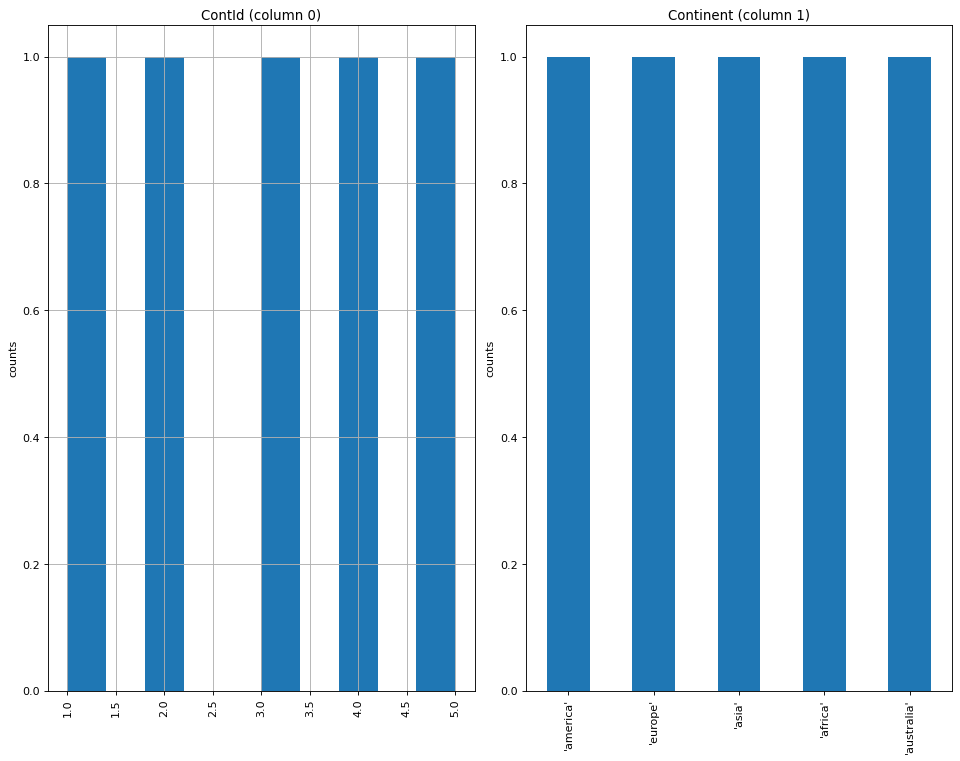

In [20]:
plotPerColumnDistribution(df5, 10, 5)

In [21]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# car-makers.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df6 = pd.read_csv('C:\\Users\\Hp\\Documents\\spider\\database\\car_1\\data_csv\\cars-data.csv', delimiter=',', nrows = nRowsRead)
df6.dataframeName = 'cars-data.csv'
nRow, nCol = df6.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 406 rows and 8 columns


In [22]:
df6.head(5)

,Id,MPG,Cylinders,Edispl,Horsepower,Weight,Accelerate,Year
0,1,18.0,8,307.0,130.0,3504,12.0,1970
1,2,15.0,8,350.0,165.0,3693,11.5,1970
2,3,18.0,8,318.0,150.0,3436,11.0,1970
3,4,16.0,8,304.0,150.0,3433,12.0,1970
4,5,17.0,8,302.0,140.0,3449,10.5,1970


C:\Users\Hp\AppData\Local\Temp/ipykernel_10884/2490170222.py:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)


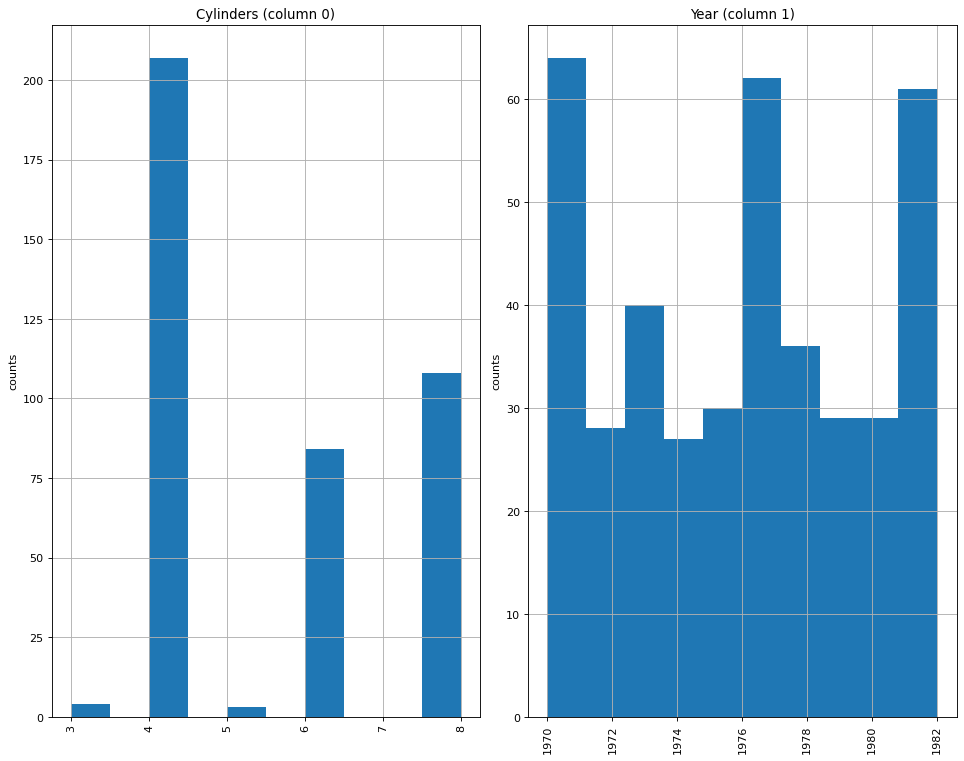

In [23]:
plotPerColumnDistribution(df6, 10, 5)